In [139]:
# Import libraries, dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import hvplot.pandas

In [191]:
# Import our healthcare data into pandas from CSV (delete this cell when healthcare info code above is complete to directly create this df)
file_path = 'Resources/combined_data.csv'
denver_df = pd.read_csv(file_path, low_memory=False)

denver_df.head()

,Zip Code,Number of Facilities,Population,Per Capita Income,Median Age
0,80015,43,70215,41860,37.6
1,80218,42,18915,71825,34.9
2,80211,42,36061,59034,34.0
3,80016,37,58948,55122,38.5
4,80012,35,53862,26477,32.8


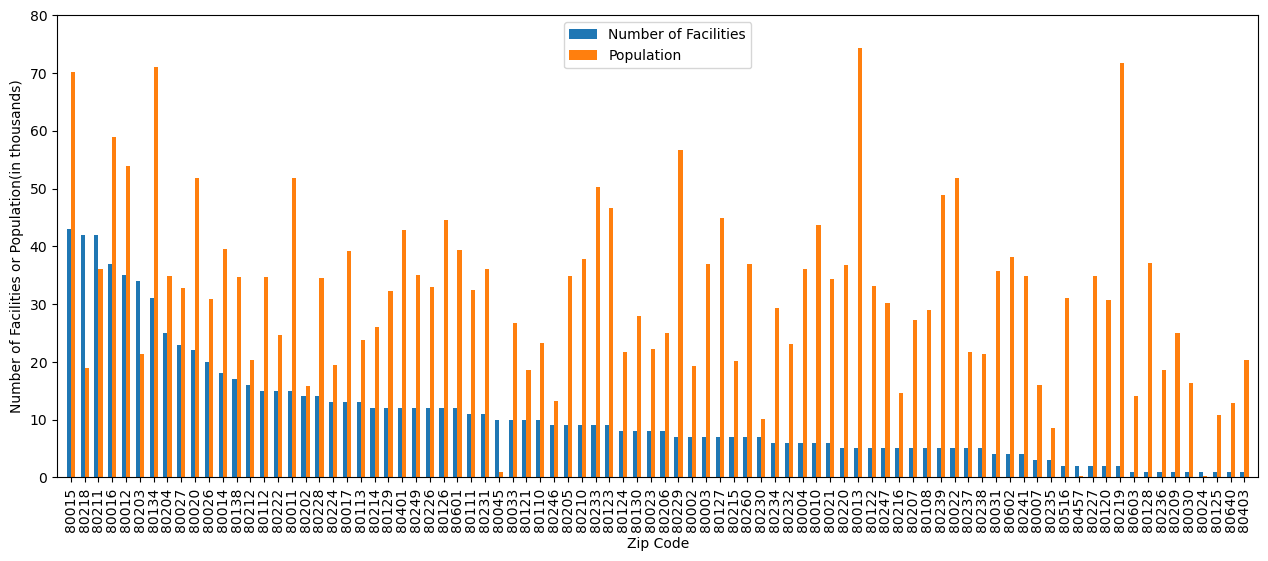

In [192]:
#Create a double bar plot showing each zip code's number of facilities and population
#This example was very useful in creating the plot: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
x = denver_df['Zip Code'].values
y1= denver_df['Number of Facilities'].values
y2 = denver_df['Population'].div(1000)
y2 = y2.values

x_axis = np.arange(len(x))
width = .3
fig = plt.figure(figsize=(15.5, 6))
plt.bar(x_axis - width/2, y1, width = width, label = "Number of Facilities")


plt.bar(x_axis + width/2, y2, width = width, label = 'Population')
plt.axis([-1, len(x), 0, 80])
plt.xticks(x_axis, x, rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Number of Facilities or Population(in thousands)')
plt.legend();


The correlation coefficient between Population and Number of facilities is 0.34 
The p-value is 0.001501650116741033


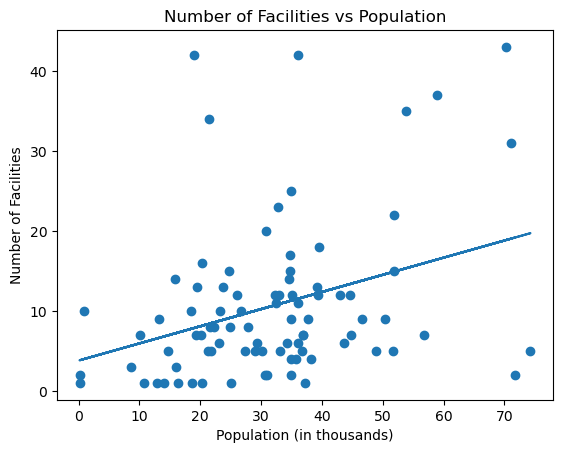

In [193]:
#create a scatter plot Number of Facilities vs Population
plt.scatter(y2, y1)
plt.xlabel('Population (in thousands)')
plt.ylabel('Number of Facilities')
plt.title('Number of Facilities vs Population')

#perform a linear regression
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(y2, y1)
#create the equation of a line
pe_fit = pe_slope * y2 + pe_int
plt.plot(y2, pe_fit)
#print the correlation coefficient
corr = stats.pearsonr(y2,y1)
print(f"The correlation coefficient between Population and Number of facilities is {round(corr[0],2)} \nThe p-value is {corr[1]}")

In [194]:
#read in detailed healthcare facility data frame
file_path = 'Resources/denver_healthcare_data.csv'
healthcare_df = pd.read_csv(file_path, low_memory=False)
healthcare_df.head()

,Unnamed: 0,Facility Name,Categories,Zipcode,Lat,Lng
0,0,Presbyterian / Saint Luke's Medical Center,"['building', 'building.healthcare', 'healthcar...",80218.0,39.747157,-104.967097
1,1,AdventHealth Parker Hospital,"['healthcare', 'healthcare.hospital']",80138.0,39.548590,-104.769092
2,2,The Medical Center Of Aurora,"['healthcare', 'healthcare.hospital']",80012.0,39.690247,-104.832144
3,3,Porter Adventist Hospital,"['healthcare', 'healthcare.hospital']",80210.0,39.669970,-104.975883
4,4,Swedish Medical Center,"['healthcare', 'healthcare.hospital']",80113.0,39.654280,-104.981215


In [195]:
#Create a map of Denver healthcare facilities, colred according to categories
denver_h_map = healthcare_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    scale = 2,
    color = "Categories",
    hover_cols = ["Facility Name", "Zipcode"]
)

denver_h_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Categories,Facility Name,Zipcode)

In [197]:
df = healthcare_df.dropna()
df = df.reset_index()
df = pd.DataFrame(df)
df = df.rename(columns={'Zipcode':'Zip Code'})
df['Zip Code'] = df['Zip Code'].astype('int64')
df = df.groupby(by='Zip Code').head(1).sort_values(by='Zip Code')
len(df)

95

In [207]:
df_full = df.merge(denver_df)
df_full.head()

,index,Unnamed: 0,Facility Name,Categories,Zip Code,Lat,Lng,Number of Facilities,Population,Per Capita Income,Median Age
0,109,109,The Raleigh House,['healthcare'],80002,39.789793,-105.073198,7,19319,41332,36.6
1,49,49,Bright Now! Dental,"['healthcare', 'healthcare.dentist']",80003,39.841056,-105.081948,7,36914,35063,36.3
2,339,339,CSL Plasma,['healthcare'],80004,39.814088,-105.130489,6,36118,41082,42.4
3,499,499,Walgreens,"['commercial.health_and_beauty', 'commercial.h...",80007,39.811756,-105.169879,3,16048,59539,38.2
4,106,106,Comfort Dental,"['healthcare', 'healthcare.dentist']",80010,39.740555,-104.866804,6,43653,20293,32.5


In [209]:
#Create a map of Denver Zip Codes(represented by the first facility in df in that zip code), colred according to Number of Facilities and sized according to population

denver_h_map = df_full.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    scale = 2,
    size = y2,
    color = "Number of Facilities",
    hover_cols = ["Zipcode", "Population", "Per Capita Income", "Median Age"]
)

denver_h_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Number of Facilities,_size,Population,Per Capita Income,Median Age)